
# Projet: Analyse d'un ensemble de données de rendez-vous des patients (noshowappointment-kagglev2-may-2016)

## Plan (Sommaire)
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Org">Organisation des données</a></li>
<li><a href="#edd">Exploration des données</a></li>
<li><a href="#concl">Conclusions</a></li>
<li><a href="#limite">Limitation</a></li>   
<li><a href="#biblio">Bibliographie</a></li>
</ul>

<a id='intro'></a>
## Introduction

>Dans ce projet, nous étudierons l'ensemble de données No-show Appointments [ici](https://www.kaggle.com/joniarroba/noshowappointments). Il contient 100 000 rendez-vous médicaux enregistrés au Brésil et se concentre principalement sur le fait que le patient se soit rendu au rendez-vous ou non. Nous examinerons les modèles de non-présentation et d'autres attributs associés.
1. PatientId : numéro d'identification de chaque patient.
2. AppointmentID : numéro d'identification de chaque rendez-vous pris.
3. Sexe : le patient est-il un homme ou une femme ?
4. ScheduledDay : le jour où quelqu'un s'est enregistré/a appelé pour prendre le rendez-vous.
5. AppointmentDay : Le jour réel où le patient doit consulter le médecin. 
6. Âge : quel âge a le patient.
7. Quartier : emplacement de l'hôpital/de la clinique.
8. Bourse d'études : si le patient est inscrit ou non dans un programme d'aide sociale brésilien qui fournit une aide financière. 0 ou 1 pour non ou oui.
9. Hypertension : 0 ou 1 pour non ou oui.
10. Diabète : 0 ou 1 pour non ou oui.
11. Handcap : 0, 1, 2, 3 ou 4 pour le niveau d'handicap.
12. SMS_received : si des messages ont été envoyés au patient pour un rappel. 0 ou 1 pour non ou oui.
13. No-show : si le patient s'est rendu au rendez-vous ou non. Oui pour ne pas se présenter, Non pour se présenter.

### Questions de l'analyse
> **1- Quels sont les facteurs que nous devons connaître pour prédire si un patient se présentera à son rendez-vous ?** 

> **2- À quelle fréquence les hommes se rendent-ils à l'hôpital par rapport aux femmes ? Lequel d'entre eux est le plus susceptible de se présenter ?** 


In [1]:
# importation des outils
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


<a id='wrangling'></a>
## Organisation des données



### Propriétés Générale

In [2]:
# Chargez vos données et visualisez quelques lignes. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
# types de données des colonnes
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [4]:
# Vérification de la taille de l'ensemble de données (nombres de lignes, nombres de colonnes)
df.shape

(110527, 14)

In [5]:
# Vérification des données manquantes
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# Vérification des doublons
df.duplicated().sum()

0

In [7]:
# types et recherchez les instances de données manquantes ou éventuellement erronées.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [8]:
# nombre de valeurs uniques
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
# Affichage des données statistiques de colonnes (moyenne, minimun, maximun, etc)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Remarque : 
- notre jeu de données se compose de 110527 lignes avec 14 colonnes 
- n'a pas d'élèment null, ni de valeurs dupliquées.
- les noms de colonnes doivent être modifier
- Les colonnes PatientId et AppointmentId ne seraient pas utiles lors de l'analyse.
- ScheduledDay et AppointmentDay doivent être convertis en type de données de date.
- supprimer les date ScheduledDay supérieur à celle AppointmentDay
- Les colonnes d'âge ont des valeurs uniques incohérentes qui doivent être gérées.





### Nettoyage des données


In [10]:
# afficher les identifiants de colonnes
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [11]:
# changer les noms des colonnes de l'anglais au francais et en minuscule 
df.rename(columns={'PatientId':'id_pat', 'AppointmentID':'id_rdv', 'Gender':'sexe', 'ScheduledDay':'jour_rdv_pat',
       'AppointmentDay':'jour_rdv', 'Age':'age', 'Neighbourhood':'quartier_hopital', 'Scholarship':'bourse', 'Hipertension':'hypertendu',
'Diabetes':'diabetique', 'Alcoholism':'alcoolique', 'Handcap':'handicaper', 'SMS_received':'sms_reçu', 'No-show':'présent_rdv'},inplace=True)

In [12]:
# Visualiser le changement
df

,id_pat,id_rdv,sexe,jour_rdv_pat,jour_rdv,age,quartier_hopital,bourse,hypertendu,diabetique,alcoolique,handicaper,sms_reçu,présent_rdv
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [13]:
# supprimer les colonnes inutiles
df.drop(['id_rdv', 'id_pat'], axis = 1, inplace=True)

In [14]:
# visualiser
df

,sexe,jour_rdv_pat,jour_rdv,age,quartier_hopital,bourse,hypertendu,diabetique,alcoolique,handicaper,sms_reçu,présent_rdv
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [15]:
df['jour_rdv_pat'] = pd.to_datetime(df['jour_rdv_pat'])
df['jour_rdv'] = pd.to_datetime(df['jour_rdv'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   sexe              110527 non-null  object             
 1   jour_rdv_pat      110527 non-null  datetime64[ns, UTC]
 2   jour_rdv          110527 non-null  datetime64[ns, UTC]
 3   age               110527 non-null  int64              
 4   quartier_hopital  110527 non-null  object             
 5   bourse            110527 non-null  int64              
 6   hypertendu        110527 non-null  int64              
 7   diabetique        110527 non-null  int64              
 8   alcoolique        110527 non-null  int64              
 9   handicaper        110527 non-null  int64              
 10  sms_reçu          110527 non-null  int64              
 11  présent_rdv       110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(

In [16]:
df.drop (df[ df['jour_rdv_pat'].dt.date > df['jour_rdv'].dt.date ].index, inplace=True)
df.shape

(110522, 12)

In [17]:
# explorer les valeurs incohérentes de l'age
df[df['age'] < 0]

,sexe,jour_rdv_pat,jour_rdv,age,quartier_hopital,bourse,hypertendu,diabetique,alcoolique,handicaper,sms_reçu,présent_rdv
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [18]:
# supprimer ces lignes
df.drop(df[df['age'] < 0].index, inplace = True)
df[df['age'] < 0]

,sexe,jour_rdv_pat,jour_rdv,age,quartier_hopital,bourse,hypertendu,diabetique,alcoolique,handicaper,sms_reçu,présent_rdv


<a id='eda'></a>
## Exploration des données


### Question 1: Quels sont les facteurs que nous devons connaître pour prédire si un patient se présentera à son rendez-vous ?

> Pour répondre à cette question, nous allons:
- définir une fonction de représentation du diagramme en barre pour différent élément suivant sa présence ou nom au rendez-vous
- représenter les différentes courbees d'analyse de facteurs*
- interpréter chaque graphe*

In [19]:
# construction d'une fonction pour réduire la répétition du code
def Showplot(df, jean, normalize=True):
    df['présent_rdv'].groupby(df[jean]).value_counts(normalize=normalize).unstack('présent_rdv').plot(kind='bar', rot=0, width=0.8, figsize=(14,6), edgecolor='black')
    plt.title("Présent/Pas présent for {}".format(jean).title(), fontsize = 14, weight = "bold")
    plt.xlabel(jean.title(),fontsize = 10, weight = "bold")
    plt.ylabel("Frequency".title(),fontsize = 10, weight = "bold")
    plt.legend(bbox_to_anchor=(1, 1),title="présent_rdv");

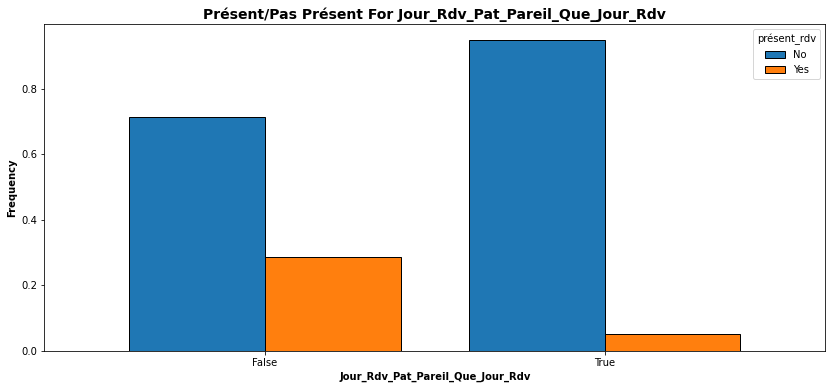

In [20]:
df['jour_rdv_pat_pareil_que_jour_rdv'] = df['jour_rdv_pat'].dt.day == df['jour_rdv'].dt.day
Showplot(df, 'jour_rdv_pat_pareil_que_jour_rdv');

In [21]:
même = df[df['jour_rdv_pat'].dt.day == df['jour_rdv'].dt.day]
différent = df[df['jour_rdv_pat'].dt.day != df['jour_rdv'].dt.day]
même.head();

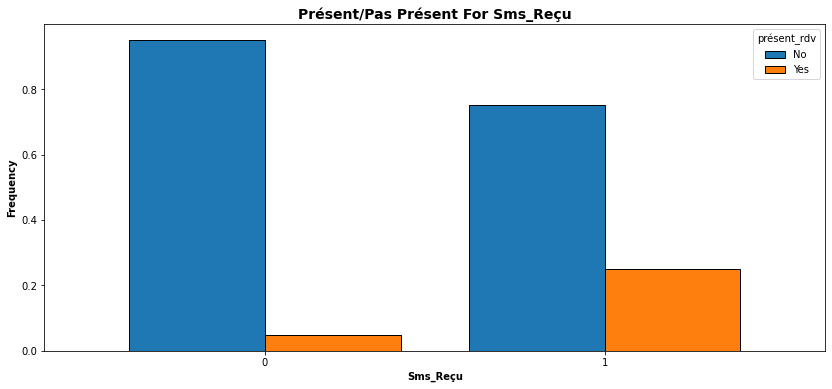

In [22]:
Showplot(même, 'sms_reçu');

**Observation1:** Lorsque le 'jour_rdv_pat' est le même que le 'jour_rdv', la probabilité d'assister au rendez-vous augmente lorsque l'on reçoit le sms par SMS_reçu

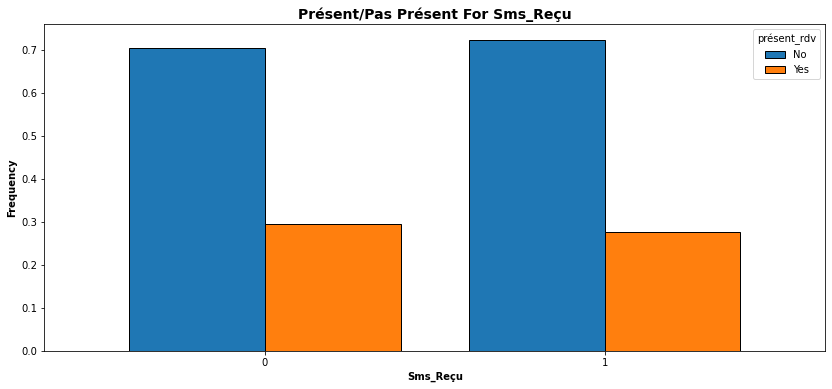

In [23]:
Showplot(différent, 'sms_reçu');

**Observation2:** Lorsque le 'jour_rdv_pat' n'est pas le même que le 'jour_rdv', la probabilité d'assister au rendez-vous n'est pas précise pour ceux qui reçoivent le SMS

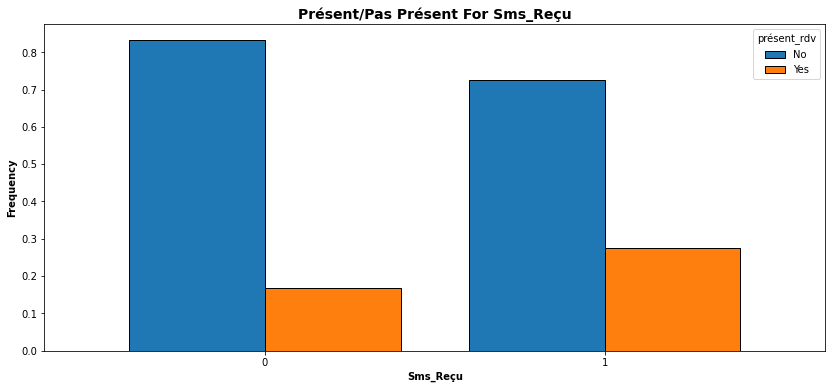

In [24]:
Showplot(df, 'sms_reçu');

**Observation3:** L'envoi d'un message n'est pas un facteur important, la plupart de ceux qui assistent sont ceux qui n'ont pas reçu de message

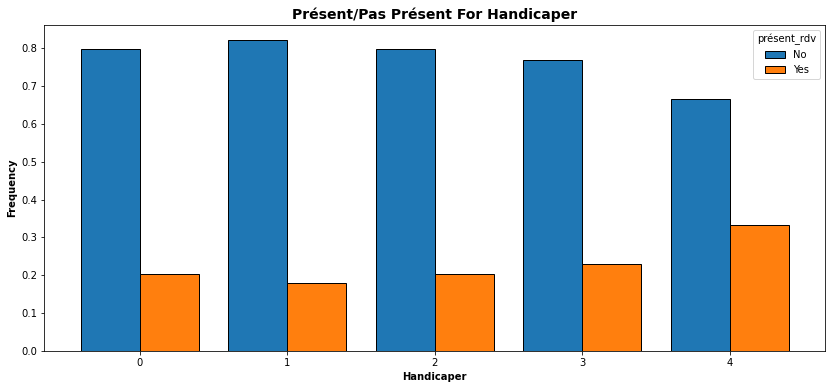

In [25]:
Showplot(df, 'handicaper');

**Observation4:** La probabilité d'assister à un rendez-vous augmente lorsque le patient a un Handicape.

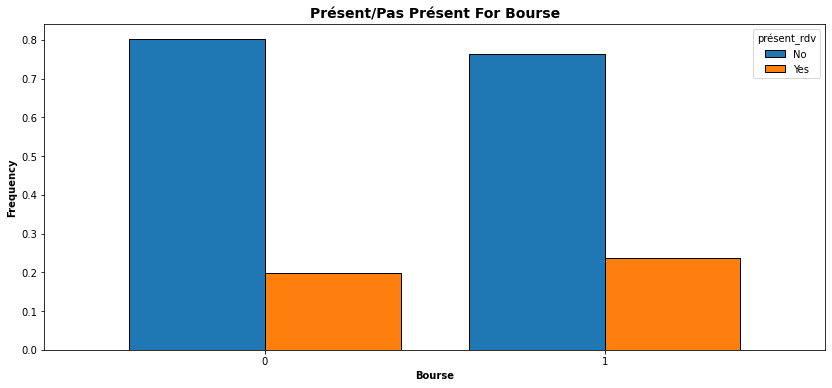

In [26]:
Showplot(df, 'bourse');

**Observation5:** La bourse est un facteur important pour prédire si un patient se présentera ou non à son rendez-vous. Ne pas obtenir de bourse augmente la probabilité d'assister au rendez-vous

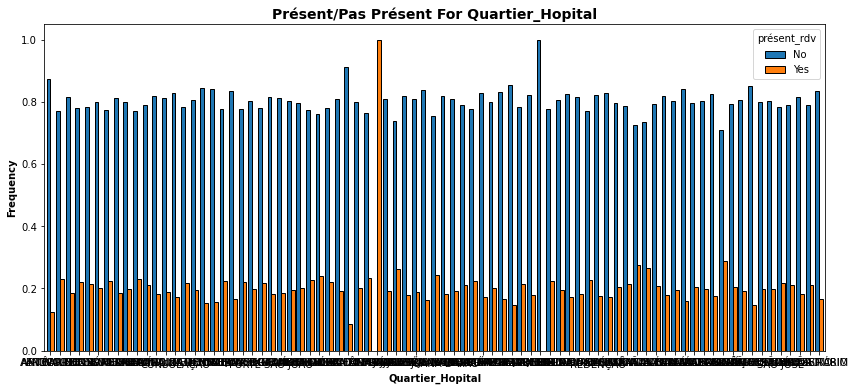

In [27]:
Showplot(df, 'quartier_hopital');

**Observation6:** Il semble que la probabilité d'assister à un rendez-vous ne dépend pas du quartier de l'hopital

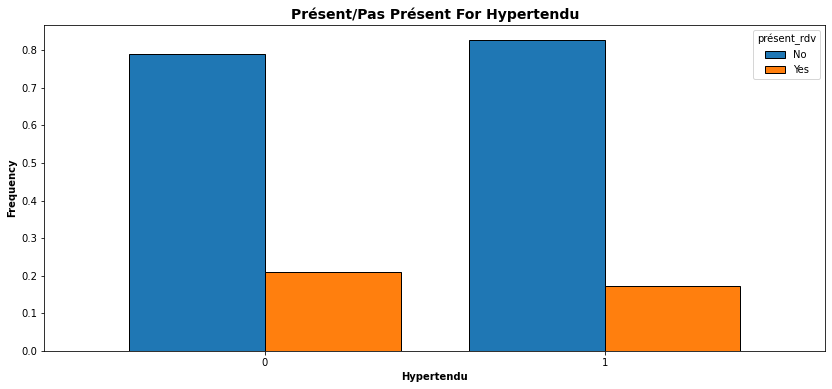

In [28]:
Showplot(df, 'hypertendu');

**Observation7:** Il semble que la probabilité d'assister à un rendez-vous augmente lorsque le patient a une hypertension

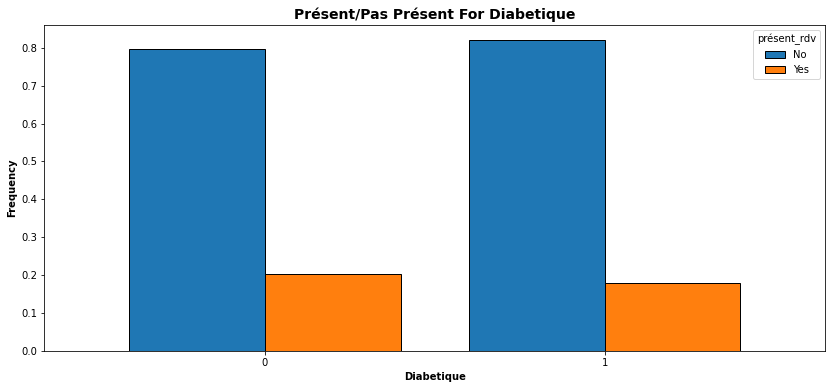

In [29]:
Showplot(df, 'diabetique');

**Observation8:** Il semble que la probabilité d'assister aux rendez-vous augmente lorsque le patient n'a pas de diabète

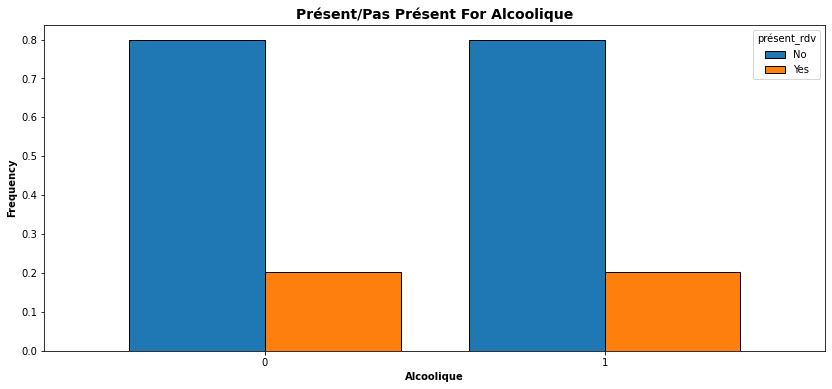

In [30]:
Showplot(df, 'alcoolique');

**Observation9:** L'alcoolisme n'est pas un facteur important pour prédire si un patient se présentera ou non à son rendez-vous

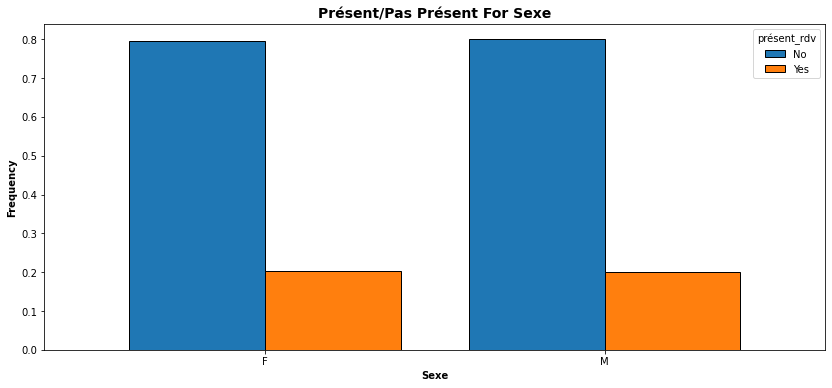

In [31]:
Showplot(df, 'sexe');

**Observation10:** On constate que le sexe n'est pas un facteur précis pour déduire si le patient va venir ou pas

In [33]:
df[(df['age'] < 10) & (df['alcoolique']== 1)]

,sexe,jour_rdv_pat,jour_rdv,age,quartier_hopital,bourse,hypertendu,diabetique,alcoolique,handicaper,sms_reçu,présent_rdv,jour_rdv_pat_pareil_que_jour_rdv
17463,M,2016-05-13 07:21:38+00:00,2016-05-17 00:00:00+00:00,7,REDENÇÃO,0,0,0,1,0,0,No,False
32817,M,2016-04-26 13:32:34+00:00,2016-05-12 00:00:00+00:00,5,RESISTÊNCIA,0,0,0,1,0,1,Yes,False
56008,M,2016-05-09 17:35:06+00:00,2016-05-09 00:00:00+00:00,7,REDENÇÃO,0,0,0,1,0,0,No,True
80263,F,2016-05-09 07:43:21+00:00,2016-05-09 00:00:00+00:00,8,FONTE GRANDE,0,0,0,1,0,0,No,True
86546,M,2016-05-24 07:42:16+00:00,2016-06-06 00:00:00+00:00,4,DA PENHA,0,0,0,1,0,1,No,False


In [34]:
df[(df['age'] < 10) & (df['hypertendu']== 1)]

,sexe,jour_rdv_pat,jour_rdv,age,quartier_hopital,bourse,hypertendu,diabetique,alcoolique,handicaper,sms_reçu,présent_rdv,jour_rdv_pat_pareil_que_jour_rdv
5561,F,2016-04-18 15:04:59+00:00,2016-05-02 00:00:00+00:00,8,NOVA PALESTINA,0,1,0,0,0,1,Yes,False
35919,M,2016-05-04 10:49:15+00:00,2016-05-09 00:00:00+00:00,7,TABUAZEIRO,0,1,0,0,0,0,No,False
37143,M,2016-04-07 15:03:57+00:00,2016-05-12 00:00:00+00:00,9,JABOUR,0,1,0,0,0,1,No,False
42840,M,2016-05-10 07:22:11+00:00,2016-05-10 00:00:00+00:00,7,SÃO CRISTÓVÃO,0,1,1,0,0,0,No,True
66102,M,2016-05-16 14:05:17+00:00,2016-05-30 00:00:00+00:00,7,SÃO CRISTÓVÃO,0,1,1,0,0,0,No,False
66456,M,2016-05-13 08:26:14+00:00,2016-05-13 00:00:00+00:00,9,SANTA MARTHA,0,1,0,0,0,0,No,True
90121,M,2016-06-07 10:22:16+00:00,2016-06-08 00:00:00+00:00,4,BONFIM,0,1,0,0,0,0,Yes,False
98155,M,2016-06-08 07:34:19+00:00,2016-06-08 00:00:00+00:00,7,SÃO CRISTÓVÃO,0,1,1,0,0,0,No,True


### Question 2: À quelle fréquence les hommes se rendent-ils à l'hôpital par rapport aux femmes ? Lequel d'entre eux est le plus susceptible de se présenter ?

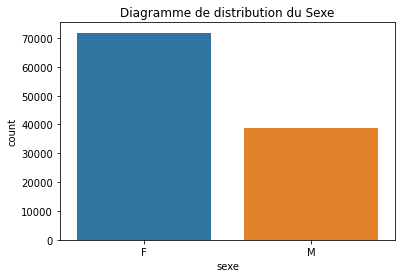

In [35]:
# affichage du graphique de comptage de la répartition par sexe dans notre ensemble de données
sns.countplot(x = 'sexe', data = df)
plt.title("Diagramme de distribution du Sexe")
plt.show()

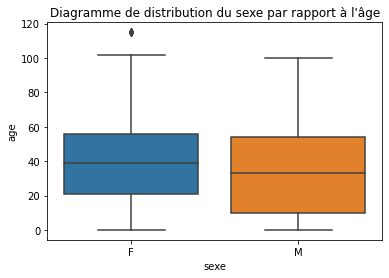

In [36]:
# visualisation du graphique de la distribution par sexe en fonction de l'âge dans notre ensemble de données
sns.boxplot(x = 'sexe', y = 'age', data = df)
plt.title("Diagramme de distribution du sexe par rapport à l'âge")
plt.show();

**Rmq1:** nous pouvons remarquer que près de la moitié de notre ensemble de données se compose de femmes avec une distribution d'âge plus large et quelques valeurs aberrantes, qui atteignent toutes un taux plus élevé que les hommes.

In [37]:
df['présent_rdv'].value_counts()

No     88207
Yes    22314
Name: présent_rdv, dtype: int64

**Rmq2:** il est évident que 79,8% de nos patients se sont présentés à leurs rendez-vous et seulement 20,1% d'entre eux ne l'ont pas fait.
permet de plonger plus profondément pour voir si cela est lié au sexe.

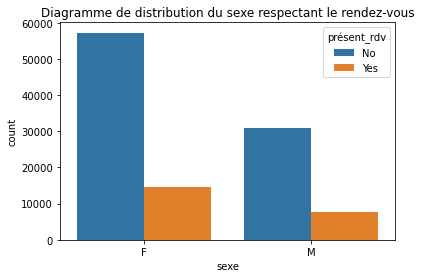

In [38]:
# montrant la répartition du genre par rapport à la colonne des non-présentations
sns.countplot(x = 'sexe', data = df, hue = 'présent_rdv')
plt.title('Diagramme de distribution du sexe respectant le rendez-vous')
plt.show()

**Rmq3:** A partir du tableau ci-dessus, nous pouvons conclure que les femmes se présentent plus souvent à leurs rendez-vous que les hommes, mais cela peut être affecté par le pourcentage de femmes sur cet ensemble de données.

<a id='conclusions'></a>
## Conclusions

- On constate qu'aprés analyse et étude graphique les facteurs que nous devont présenter pour prédire qu'un patient viendra à son rendez-vous sont les suivant: la bourse, le fait que le patient soit hypertendu, il fait du diabéte et encore lorsque le jour de prise du rendez-vous coincide avec celui du rendez-vous proprement dit

- Près de la moitié de notre ensemble de données se compose de femmes avec une distribution d'âge plus large et quelques valeurs aberrantes, qui atteignent toutes un taux plus élevé que les hommes. Il est évident que 79,8% de nos patients se sont présentés à leurs rendez-vous et seulement 20,1% d'entre eux ne l'ont pas fait. Les femmes se présentent à leurs rendez-vous plus souvent que les hommes, mais cela peut être affecté par le pourcentage de femmes dans cet ensemble de données.

<a id='limite'></a>
## Limitation

Par ailleur il y'a des contrainte de prédiction que l'on peut dénombrer du fait de certaines information sensible à savoir:
- le fait que les données contiennent des informations incohérentes telle qu'un patient de moins de 10 ans déclarer alcoolique ou encore hypertendu
- l'âge du patient est aussi difficile de prédiction et ne facilite pas les chose
- les critéres d'attribution de la bourse
- le fait de s'assurer que le patient est été informer de son rendez-vous

<a id='biblio'></a>
## Bibliographie

- https://learn.udacity.com/nanodegrees/nd002-alg-t2-fr/parts/56a0e67a-bef1-4a3f-8399-9380c256cd9d/lessons/b40477ea-c97a-493c-a0e6-2f4d504979f6/concepts/b40477ea-c97a-493c-a0e6-2f4d504979f6-submit-project
- https://python.sdv.univ-paris-diderot.fr/cours-python.pdf
- Google pour la recherche des commandes d'exécution